In [1]:
import cv2
import numpy as np

# Read the image
img = cv2.imread('thin.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Draw the detected lines on the image
for r_theta in lines:
    rho, theta = r_theta[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * a)
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * a)
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
cv2.imshow('Detected Lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


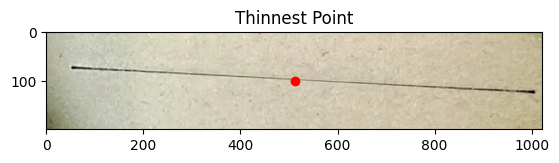

Thinnest Point Coordinates (x, y): 513 99


In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def find_thinnest_line(image_path):
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    img = cv2.imread(image_path)
    
    if img is None:
        raise ValueError(f"Error loading image: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=5)

    if lines is None or len(lines) == 0:
        raise ValueError("No lines detected in the image.")

    image_center = (img.shape[1] // 2, img.shape[0] // 2)

    def distance_from_center(x, y):
        return np.sqrt((x - image_center[0])**2 + (y - image_center[1])**2)

    thinnest_point = min(lines, key=lambda line: distance_from_center((line[0, 0] + line[0, 2]) // 2, (line[0, 1] + line[0, 3]) // 2))

    img_thinnest = img.copy()
    x, y = (thinnest_point[0, 0] + thinnest_point[0, 2]) // 2, (thinnest_point[0, 1] + thinnest_point[0, 3]) // 2
    cv2.circle(img_thinnest, (x, y), 5, (0, 0, 255), 1)

    plt.imshow(cv2.cvtColor(img_thinnest, cv2.COLOR_BGR2RGB))
    plt.scatter(x, y, c='red', marker='o')
    plt.title('Thinnest Point')
    plt.show()

    return thinnest_point

image_path = 'thin.jpg'

try:
    thinnest_point = find_thinnest_line(image_path)
    print("Thinnest Point Coordinates (x, y):", (thinnest_point[0, 0] + thinnest_point[0, 2]) // 2, (thinnest_point[0, 1] + thinnest_point[0, 3]) // 2)
except FileNotFoundError as e:
    print(f"Error: {e}")
except ValueError as e:
    print(f"Error: {e}")
    
    
    
    
#'Focus ruler (1).dxf'


In [10]:
!pip install ezdxf


                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB 1.4 MB/s eta 0:00:02
     --                                       0.1/1.8 MB 1.3 MB/s eta 0:00:02
     ---                                      0.2/1.8 MB 1.3 MB/s eta 0:00:02
     -----                                    0.2/1.8 MB 1.3 MB/s eta 0:00:02
     -----                                    0.3/1.8 MB 1.2 MB/s eta 0:00:02
     -----                                    0.3/1.8 MB 1.2 MB/s eta 0:00:02
     ------                                   0.3/1.8 MB 1.0 MB/s eta 0:00:02
     -------                                  0.3/1.8 MB 936.6 kB/s eta 0:00:02
     --------                                 0.4/1.8 MB 892.7 kB/s eta 0:00:02
     --------                                 0.4/1.8 MB 867.0 kB/s eta 0:00:02
     ---------                                0.4/1.8 MB 859.0 kB/s eta 0:00:02
     ---------                                0.4/1.8 MB 859.0 


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
!pip install ezdxf matplotlib



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2
import numpy as np
import os
# Load the image
image = cv2.imread('thin.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection (if needed)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Draw detected lines on a copy of the original image
line_image = np.copy(image)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Straighten the detected line
angle = theta * 180 / np.pi
if angle < 45:
    angle += 90
else:
    angle -= 90

h, w = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR)

# Display results
cv2.imshow('Original Image with Detected Lines', line_image)
cv2.imwrite('Rotated Image.jpg', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

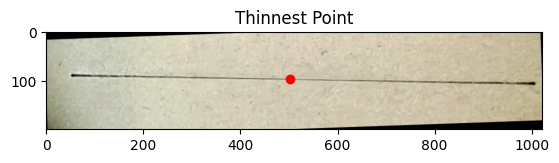

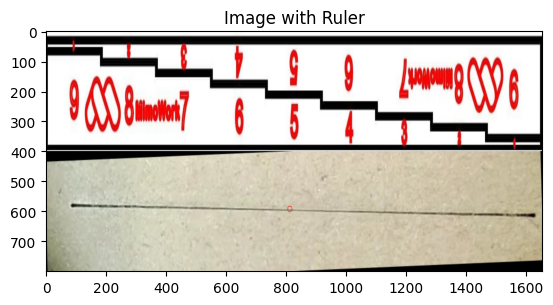

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import math


def find_thinnest_line(image_path):
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    img = cv2.imread(image_path)
    
    if img is None:
        raise ValueError(f"Error loading image: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=5)

    if lines is None or len(lines) == 0:
        raise ValueError("No lines detected in the image.")

    image_center = (img.shape[1] // 2, img.shape[0] // 2)

    def distance_from_center(x, y):
        return np.sqrt((x - image_center[0])**2 + (y - image_center[1])**2)

    thinnest_point = min(lines, key=lambda line: distance_from_center((line[0, 0] + line[0, 2]) // 2, (line[0, 1] + line[0, 3]) // 2))

    img_thinnest = img.copy()
    x, y = (thinnest_point[0, 0] + thinnest_point[0, 2]) // 2, (thinnest_point[0, 1] + thinnest_point[0, 3]) // 2
    cv2.circle(img_thinnest, (x, y), 5, (0, 0, 255), 1)

    plt.imshow(cv2.cvtColor(img_thinnest, cv2.COLOR_BGR2RGB))
    plt.scatter(x, y, c='red', marker='o')
    plt.title('Thinnest Point')
    plt.show()

    return img_thinnest, thinnest_point

def resize_image(image, target_height, target_width=None):
    if target_width is None:
        ratio = target_height / image.shape[0]
        target_width = int(image.shape[1] * ratio)
    return cv2.resize(image, (target_width, target_height))

# Load the thinnest point image
image_path_thin = 'Rotated Image.jpg'
img_thinnest, thinnest_point = find_thinnest_line(image_path_thin)

# Check if the image loading was successful
if img_thinnest is None or thinnest_point is None:
    raise ValueError("Error loading thinnest point image.")

# Load and resize the focal ruler image
image_path_ruler = 'focal.jpg'
img_ruler = cv2.imread(image_path_ruler)

# Check if the image loading was successful
if img_ruler is None:
    raise ValueError("Error loading focal ruler image.")

# Resize images to a common height and width
common_height = 400
common_width = max(img_thinnest.shape[1], img_ruler.shape[1])
img_thinnest_resized = resize_image(img_thinnest, common_height, common_width)
img_ruler_resized = resize_image(img_ruler, common_height, common_width)

# Combine images with ruler positioned above the thinnest line
combined_image = np.vstack([img_ruler_resized, img_thinnest_resized])

# Find ruler position and mark on the image
ruler_width_mm = 50  # Example ruler width in mm
position_on_ruler = math.ceil((thinnest_point[0, 0] + thinnest_point[0, 2]) / img_thinnest_resized.shape[1] * ruler_width_mm)



# Display the final composite image
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Ruler')
plt.show()
